In [1]:
import pymongo

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import plotly

In [5]:
from pandas import DataFrame, Series

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib

Using matplotlib backend: TkAgg


In [8]:
client = pymongo.MongoClient('localhost', 27017)

In [9]:
scraping = client['scraping']

In [10]:
data = scraping['data_sample']

In [11]:
for i in data.find({}, {'_id': 0, 'area': 1}).limit(10):
    print(i['area'][0])

朝阳
朝阳
西城
朝阳
丰台
朝阳
不明
朝阳
朝阳
东城


In [12]:
fig = plt.figure()
# matplotlib 的图像都位于Figure中， 可以使用plt.figure 创建一个新的Figure

In [13]:
# 不能通过空的figure来绘图， 必须使用add_subplot 创建一个或多个subplot才行

In [14]:
ax1 = fig.add_subplot(2, 2, 1 )

In [15]:
ax2 = fig.add_subplot(2, 2, 2)

In [16]:
ax3 = fig.add_subplot(2, 2, 3)

In [17]:
plt.plot(np.arange(10))

In [18]:
plt.show()

In [19]:
from numpy.random import randn

In [20]:
plt.plot(randn(50).cumsum(), 'k--')
# ‘k--' 表示黑色虚线图

In [21]:
plt.show()

In [22]:
_ = ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

In [23]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

In [24]:
# plt.subplot 创建一个新的Figure， 并返回一个含有已创建的subplot对象的numpy数组

In [25]:
fig, axes = plt.subplots(2, 3)

In [26]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3e60ac14e0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f3e6086e860>]], dtype=object)

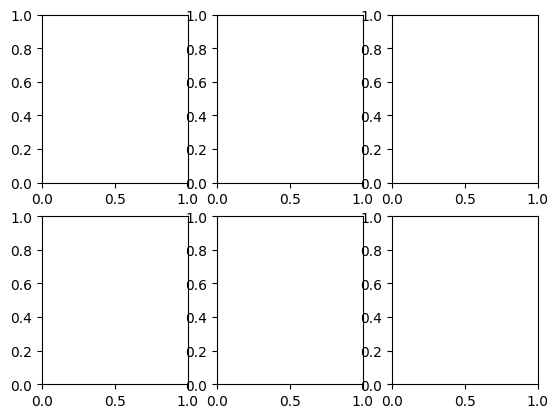

In [27]:
fig

In [28]:
# 可以对axes数组进行索引

In [29]:
# 调整subplot周围的间距

In [30]:
# subplots_adjust(left=None, bottom=None, top=None, wspace=None, hspace=None)

In [31]:
# wspace and hspace 用于控制宽度和高度的百分比， 可以看做suplot之间的间距

In [32]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

In [33]:
for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)

In [34]:
plt.subplots_adjust(wspace=0, hspace=0)

In [35]:
fig, axes = plt.subplots(sharex=True, sharey=True)

In [36]:
axes.hist(np.array([i['area'][0] for i in data.find({}, {'_id': 0, 'area': 1}).limit(10)]), bins=100, color='k', alpha=0.5)

TypeError: cannot perform reduce with flexible type

In [37]:
np.array([i['area'][0] for i in data.find({}, {'_id': 0, 'area': 1}).limit(10)])

array(['朝阳', '朝阳', '西城', '朝阳', '丰台', '朝阳', '不明', '朝阳', '朝阳', '东城'], 
      dtype='<U2')

In [38]:
# 颜色 标记 线型

In [39]:
plt.plot(randn(30).cumsum(), 'ko--')

In [40]:
# 更为明确的方式
# plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='0')

In [41]:
d = randn(30).cumsum()

In [42]:
plt.plot(d, 'k--', label='Default')

In [43]:
plt.plot(d, 'k-', drawstyle='steps-post', label='steps-post')

In [44]:
plt.legend(loc='best')
# 图例的位置

In [45]:
# 刻度 标签 图例

In [46]:
d

array([ 0.84478531,  0.27061744, -1.64073552, -0.57970465, -0.38443651,
       -1.75814418, -1.06971908, -2.89448784, -3.42392459, -3.03252276,
       -3.78978556, -4.61582165, -3.56146807, -2.10266715, -2.42456537,
       -1.65350804, -1.20341804, -1.72900898, -1.66997583, -1.7636927 ,
       -2.91311918, -1.78171684, -1.05999459, -2.62996111, -1.17799634,
       -2.76196333, -2.88020212, -2.72048972, -2.96566825, -3.60169302])

In [47]:
fig = plt.figure()

In [48]:
ax = fig.add_subplot(1, 1, 1)

In [49]:
ax.plot(randn(1000).cumsum())

In [50]:
# 修改x轴的刻度

In [51]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [52]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [53]:
ax.set_title('My first matplotlib plot')

In [54]:
ax.set_xlabel('Stages')

In [55]:
# 修改y轴类似

In [56]:
# 添加图例

In [57]:
fig = plt.figure()

In [58]:
ax = fig.add_subplot(1, 1, 1)

In [59]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [60]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [61]:
ax.plot(randn(1000).cumsum(), 'k', label='three')

In [62]:
ax.legend(loc='best')

In [63]:
# 注解 subplot上绘图

In [68]:
from datetime import datetime

In [69]:
fig = plt.figure()

In [70]:
ax = fig.add_subplot(1, 1, 1)

In [71]:
da = pd.read_csv('/home/jasd/python/pydata-book/ch08/spx.csv', index_col = 0, parse_dates=True)

In [72]:
da

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75
1990-02-08,332.96
1990-02-09,333.62
1990-02-12,330.08
1990-02-13,331.02
1990-02-14,332.01


In [73]:
spx = da['SPX']

In [74]:
spx.plot(ax=ax, style='k-')

In [75]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

In [80]:
for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50), xytext = (date, spx.asof(date) + 200), arrowprops = dict(facecolor='black'), horizontalalignment = 'left', verticalalignment='top')

In [81]:
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

(600, 1800)

In [82]:
ax.set_title('Import dates in 2008-2009 finacial crisis')